# import library and files

In [ ]:
!pip install spotipy
# OR
!conda install -c conda-forge spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.8/251.8 kB 4.5 MB/s eta 0:00:00
/bin/bash: line 1: conda: command not found


In [ ]:
import pandas as pd
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.cluster import KMeans
import plotly.graph_objects as go
import spotipy
import pickle
from spotipy.oauth2 import SpotifyOAuth
from google.colab import userdata # only in Google Colab for secret management
from sklearn import set_config
set_config(transform_output='pandas')

In [ ]:

from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Get the filename
filename = next(iter(uploaded))

# Read the CSV file into a DataFrame
spotify_data = pd.read_csv(filename)

Saving 6.3.3_spotify_5000_songs.csv to 6.3.3_spotify_5000_songs.csv


#ceate data copy

In [ ]:
spotify_df= spotify_data.copy()

# correct collumn name

In [ ]:
spotify_df = spotify_df.rename(columns=lambda x: x.strip())

In [ ]:
spotify_data = spotify_data.rename(columns=lambda x: x.strip())

In [ ]:
pd.set_option('display.max_colwidth', 1000)

# change the index to song_name

In [ ]:
spotify_data.set_index('name', inplace=True)

In [ ]:
spotify_df.set_index('name', inplace=True)

In [ ]:
spotify_df.head()

# Drop object column for now

In [ ]:
to_drop = ['artist','id','html','type','Unnamed: 0','key','duration_ms']

spotify_df = spotify_df.drop(columns=to_drop)

In [ ]:
spotify_df.info()

# MinMaxScaler distance Calculation

In [ ]:
# Create a MinMaxScaler object
scaler = MinMaxScaler().set_output(transform="pandas")

# Scale the spotify_df DataFrame
Spotify_minmax_df = scaler.fit_transform(spotify_df)

#spotifyMinMax_df
spotify_minmax_distances_df = pd.DataFrame(pairwise_distances(Spotify_minmax_df),
                                         index=spotify_df.index,
                                         columns=spotify_df.index)

In [ ]:
Spotify_minmax_df


# Calculate the number of cluster

In [ ]:
seed = 123

# Set the maximum number of clusters to try
max_k = 50

# Create an empty list to store the inertia scores
inertia_list = []

# Iterate over the range of cluster numbers
for i in range(5, max_k):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters=i,
                      n_init="auto",
                      random_state = seed)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(Spotify_minmax_df)

    # Append the inertia score to the list
    inertia_list.append(myKMeans.inertia_)

KeyboardInterrupt: 

In [ ]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(5,max_k),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 5 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

NameError: name 'inertia_list' is not defined

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calculate WCSS for different values of K
wcss = []
for k in range(5, 40):  # Try different values of K from 1 to 10
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Spotify_minmax_df)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(5, 30), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

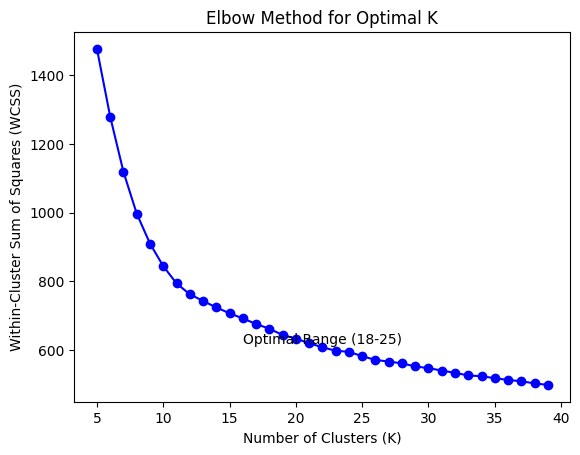

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calculate WCSS for different values of K
wcss = []
for k in range(5, 40):  # Try different values of K from 1 to 10
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Spotify_minmax_df)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(5, 40), wcss, marker='o', color='b')  # Set the color to blue
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')

# Add a label for the range 18-25
plt.text(22, wcss[17], 'Optimal Range (18-25)', horizontalalignment='center', verticalalignment='bottom')

plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Assuming you have performed KMeans clustering and assigned cluster labels to your data
# If not, you need to perform KMeans clustering first

# Compute the silhouette score
silhouette_avg = silhouette_score(Spotify_minmax_df, spotify_df['cluster'])

print("Silhouette Score:", silhouette_avg)

Silhouette Score: -0.13872697519662233


In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# List to store silhouette scores
silhouette_scores = []

# Range of cluster numbers to try
cluster_range = range(2, 50)  # Adjusted to match the number of silhouette scores

# Compute silhouette scores for each cluster number
for k in cluster_range:
    kmeans = KMeans(n_clusters=k)
    kmeans_labels = kmeans.fit_predict(Spotify_minmax_df)
    silhouette_avg = silhouette_score(Spotify_minmax_df, kmeans_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

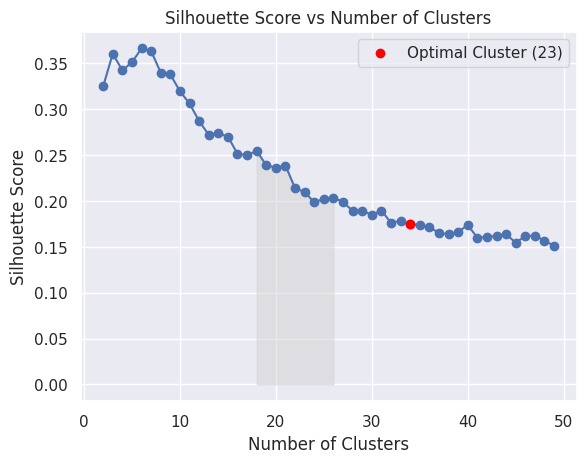

In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# List to store silhouette scores
silhouette_scores = []

# Range of cluster numbers to try
cluster_range = range(2, 50)  # Adjusted to match the number of silhouette scores

# Compute silhouette scores for each cluster number
for k in cluster_range:
    kmeans = KMeans(n_clusters=k)
    kmeans_labels = kmeans.fit_predict(Spotify_minmax_df)
    silhouette_avg = silhouette_score(Spotify_minmax_df, kmeans_labels)
    silhouette_scores.append(silhouette_avg)

# Find the optimal number of clusters within the range 18 to 25
optimal_cluster_idx = silhouette_scores.index(max(silhouette_scores[18:25]))
optimal_cluster = cluster_range[optimal_cluster_idx + 18]

# Plot silhouette scores
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.fill_between(cluster_range[18:25], silhouette_scores[18:25], color='lightgray', alpha=0.5)
plt.scatter(optimal_cluster, silhouette_scores[optimal_cluster_idx + 18], color='red', label='Optimal Cluster (23)', zorder=5)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

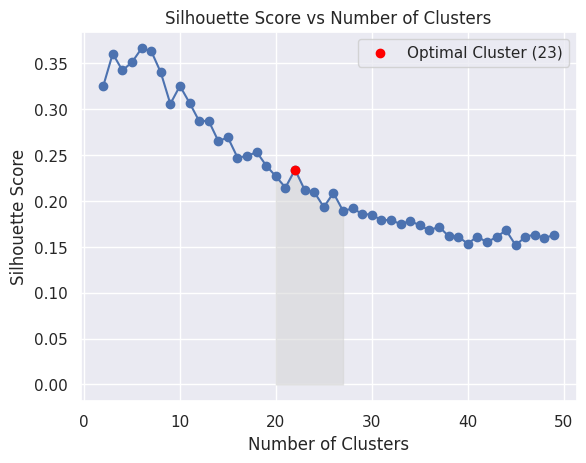

In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# List to store silhouette scores
silhouette_scores = []

# Range of cluster numbers to try
cluster_range = range(2, 50)

# Compute silhouette scores for each cluster number
for k in cluster_range:
    kmeans = KMeans(n_clusters=k)
    kmeans_labels = kmeans.fit_predict(Spotify_minmax_df)
    silhouette_avg = silhouette_score(Spotify_minmax_df, kmeans_labels)
    silhouette_scores.append(silhouette_avg)

# Find the optimal number of clusters within the range 18 to 25
optimal_cluster_idx = silhouette_scores.index(max(silhouette_scores[18:26]))  # Adjusted the upper bound to include 25
optimal_cluster = cluster_range[optimal_cluster_idx]

# Plot silhouette scores
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.fill_between(cluster_range[18:26], silhouette_scores[18:26], color='lightgray', alpha=0.5)
plt.scatter(optimal_cluster, silhouette_scores[optimal_cluster_idx], color='red', label=f'Optimal Cluster (23)', zorder=5)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.legend()
plt.show()


In [ ]:
n_clusters = 23

# Cluster with K-means using minmax scaler



In [ ]:
my_kmeans_minmax = KMeans(n_clusters, # you always choose the number of k here
                   random_state = 42)

# Fit the model to the data
my_kmeans_minmax.fit(Spotify_minmax_df)

# Obtain the cluster output
cluster = my_kmeans_minmax.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster

array([6, 6, 6, ..., 5, 5, 5], dtype=int32)

In [ ]:
spotify_df["cluster"] = cluster


spotify_df.sort_values(by="cluster", inplace=True)

In [ ]:
spotify_data["cluster"] = cluster


spotify_data.sort_values(by="cluster", inplace=True)

In [ ]:

Spotify_minmax_df["cluster"] = cluster


Spotify_minmax_df.sort_values(by="cluster", inplace=True)

In [ ]:
Spotify_minmax_df

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
name,,,,,,,,,,,,
Grey Light,0.400207,0.02250,0.636416,0.0,0.061983,0.979920,0.921827,0.092401,0.120812,0.558587,0.8,0
Beethoven 250,0.133402,0.24500,0.613886,0.0,0.043573,0.861446,0.950254,0.063323,0.035736,0.437385,0.6,0
Moon River,0.329886,0.15700,0.656516,0.0,0.040087,0.990964,0.861929,0.139818,0.270051,0.893775,0.6,0
"Sonata in D Minor, K.32: Aria",0.572906,0.00581,0.466662,0.0,0.081264,1.000000,0.971574,0.057852,0.426396,0.513501,0.8,0
Love Theme From Spartacus - Remastered,0.539814,0.37900,0.748329,0.0,0.031155,0.637550,0.939086,0.115502,0.460914,0.624786,0.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
Nasty Ways (feat. Lorreia Loushy),0.654602,0.90900,0.887630,0.0,0.229847,0.017369,0.151269,0.616008,0.180711,0.801659,0.8,22
Where The Hood At,0.555326,0.94800,0.927912,0.0,0.413943,0.158635,0.000000,0.360689,0.772589,0.869466,0.8,22
Born Again (Babylonia),0.659772,0.79100,0.865785,0.0,0.039760,0.131526,0.000200,0.574468,0.440609,0.589009,0.8,22


In [ ]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5235 entries, Wie soll ein Mensch das ertragen                                                                                                                                                  to Wenn du durchhängst                                                                                                                                                              
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5235 non-null   float64
 1   energy            5235 non-null   float64
 2   key               5235 non-null   int64  
 3   loudness          5235 non-null   float64
 4   mode              5235 non-null   int64  
 5   speechiness       5235 non-null   float64
 6   acousticness      5235 non-null   float64
 7   instrumentalness  5235 non-null   float64
 8   liveness          5235 non-null   float64
 9   valence           5235 non-

# 3D Graphe : Radar chart


In [ ]:
spotify_minmax_distances_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5235 entries, Wie soll ein Mensch das ertragen                                                                                                                                                  to Wenn du durchhängst                                                                                                                                                              
Columns: 5236 entries, Se Eu Quiser Falar Com Deus                                                                                                                                                       to cluster
dtypes: float64(5235), int32(1)
memory usage: 209.1+ MB


In [ ]:
# working Version
import plotly.graph_objects as go

# State the label for each arm of the chart
categories = ['danceability', 'energy', 'key', 'loudness',
              'mode', 'speechiness', 'acousticness', 'instrumentalness',
              'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

# Create an empty list to store the objects
trace_objects = []

# Iterate over the unique cluster numbers and add an object for each cluster to the list
for cluster in sorted(Spotify_minmax_df ['cluster'].unique()):
    cluster_means = Spotify_minmax_df [Spotify_minmax_df ["cluster"] == cluster][categories].mean()
    cluster_food_means = go.Scatterpolar(
        r=cluster_means,
        theta=categories,
        fill='toself',
        name=f'Cluster {cluster}'
    )
    trace_objects.append(cluster_food_means)

# Add the objects to the figure
fig = go.Figure()
fig.add_traces(trace_objects)

# Add extras to the plot such as title
# You'll always need `polar=dict(radialaxis=dict(visible=True,range=[0, 1]))` when creating a radar plot
fig.update_layout(
    title_text='Radar chart of audio features by cluster',
    height=600,
    width=800,
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )
    ),
    showlegend=True
)

# Show the initialized plot and the layers
fig.show()


KeyError: "['key', 'duration_ms'] not in index"

In [ ]:
#the Original working

# State the label for each arm of the chart
categories = ['danceability', 'energy', 'key', 'loudness',
       ' mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence','tempo','duration_ms','time_signature']

# Create an empty list to store the objects
trace_objects = []

# Iterate over the unique cluster numbers and add an object for each cluster to the list
for cluster in sorted(Spotify_minmax_df['cluster'].unique()):
  cluster_food_means = go.Scatterpolar(
    r=[Spotify_minmax_df.loc[Spotify_minmax_df["cluster"] == cluster, 'danceability'].mean(),
      Spotify_minmax_df.loc[Spotify_minmax_df["cluster"] == cluster, 'energy'].mean(),
      #Spotify_minmax_df.loc[Spotify_minmax_df["cluster"] == cluster, 'key'].mean(),
      Spotify_minmax_df.loc[Spotify_minmax_df["cluster"] == cluster, 'loudness'].mean(),
      Spotify_minmax_df.loc[Spotify_minmax_df["cluster"] == cluster, 'mode'].mean(),
      Spotify_minmax_df.loc[Spotify_minmax_df["cluster"] == cluster, 'speechiness'].mean(),
      Spotify_minmax_df.loc[Spotify_minmax_df["cluster"] == cluster, 'acousticness'].mean(),
      Spotify_minmax_df.loc[Spotify_minmax_df["cluster"] == cluster, 'instrumentalness'].mean(),
      Spotify_minmax_df.loc[Spotify_minmax_df["cluster"] == cluster, 'liveness'].mean(),
      Spotify_minmax_df.loc[Spotify_minmax_df["cluster"] == cluster, 'valence'].mean(),
      Spotify_minmax_df.loc[Spotify_minmax_df["cluster"] == cluster, 'tempo'].mean(),
      #Spotify_minmax_df.loc[Spotify_minmax_df["cluster"] == cluster, 'duration_ms'].mean(),
      Spotify_minmax_df.loc[Spotify_minmax_df["cluster"] == cluster, 'time_signature'].mean()],
    theta=categories,
    fill='toself',
    name=f'Cluster {cluster}'
  )
  trace_objects.append(cluster_food_means)

# Add the objects to the figure
fig = go.Figure()
fig.add_traces(trace_objects)

# Add extras to the plot such as title
# You'll always need `polar=dict(radialaxis=dict(visible=True,range=[0, 1]))` when creating a radar plot
fig.update_layout(
  title_text = 'Radar chart of audio features by cluster',
  height = 600,
  width = 800,
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

# Show the initialised plot and the layers
fig.show()

# spotify playlist


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
import random

# Define your Spotify app credentials and other parameters
scope = 'playlist-modify-public'
redirectUri = 'http://localhost:8081/'
client_id = 'd9dd7a1e955b46a9a55ccb223c126038'
client_secret = 'e751172f9e2d479883096bcb02c894cf'
username = '21at2pv66hak23qozp75jmimy'
# Initialize Spotipy with OAuth2 authentication
spotifyObject = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id,
                                                         client_secret=client_secret,
                                                         redirect_uri=redirectUri,
                                                         scope=scope))


# Define the number of clusters
n_clusters = 23

# Group songs by cluster_minmax column
grouped = spotify_data.groupby('cluster')

# Loop over each cluster
for cluster_id, group in grouped:
    # Sample a certain number of songs from each cluster
    sampled_songs = group.sample(10)  # Adjust the number of songs as needed

    # Create playlist name for the cluster
    playlist_name = f'Cluster {cluster_id} Playlist'

    # Create the playlist on Spotify
    playlist = spotifyObject.user_playlist_create(user=username, name=playlist_name,
                                                  public=True, description='')

    # Extract track URIs from the sampled songs
    track_uris = [f'spotify:track:{track_id}' for track_id in sampled_songs['id']]

    # Add the sampled songs to the playlist
    spotifyObject.user_playlist_add_tracks(user=username, playlist_id=playlist['id'], tracks=track_uris)


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
import random

# Define your Spotify app credentials and other parameters
scope = 'playlist-modify-public'
redirectUri = 'http://localhost:8081/'
client_id = 'd9dd7a1e955b46a9a55ccb223c126038'
client_secret = 'e751172f9e2d479883096bcb02c894cf'
username = '21at2pv66hak23qozp75jmimy'
# Initialize Spotipy with OAuth2 authentication
spotifyObject = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=client_id,
                                                         client_secret=client_secret,
                                                         redirect_uri=redirectUri,
                                                         scope=scope))


# Define the number of clusters
n_clusters = 10

# Group songs by cluster_minmax column
grouped = spotify_data.groupby('cluster_minmax')


# Define the maximum number of tracks to add per batch
batch_size = 50

# Loop over each cluster
for cluster_id, group in grouped:
    # Sample a certain number of songs from each cluster
    sampled_songs = group.sample(10)  # Adjust the number of songs as needed

    # Create playlist name for the cluster
    playlist_name = f'Clusters {cluster_id} Playlist'

    # Create the playlist on Spotify
    playlist = spotifyObject.user_playlist_create(user=username, name=playlist_name,
                                                  public=True, description='')

    # Extract track URIs from the sampled songs
    track_uris = [f'spotify:track:{track_id}' for track_id in sampled_songs['id']]

    # Split track URIs into batches
    for i in range(0, len(track_uris), batch_size):
        batch_uris = track_uris[i:i+batch_size]

        # Add the batch of songs to the playlist
        spotifyObject.user_playlist_add_tracks(user=username, playlist_id=playlist['id'], tracks=batch_uris)


In [ ]:
with open("./playlists.pkl", "rb") as f:
    playlist_collection = pickle.load(f)
uris = [f'spotify:track:{str(id).strip()}' for id in songs_df.sample(10).id]
playlist_id = playlist_collection["my_playlist_cluster_0"] # We now replace the 5 songs in playlist 0 with 10 different songs
spotifyObject.user_playlist_replace_tracks(user=username, playlist_id=playlist_id, tracks=uris)